## Aufgabe H.3.5

Zunächst importieren wir benötigte Python-Module. Mit der Tastenkombination ```Shift + Enter``` können Sie in einem Zug die aktuelle Codezelle ausführen und zur nächsten springen.

In [17]:
# Hier ist nichts zu tun, nur ausführen.
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from scipy.stats import norm
import tensorflow as tf
import time

Wir definieren zunächst die Funktion

$$f(x):=\cal{N}(x; -3, 0.3) + \cal{N}(x; -2, 0.2) - \cal{N}(x; -1, 0.1) - \cal{N}(x; 1, 0.1) + \cal{N}(x; 2, 0.2) + \cal{N}(x; 3, 0.3)\, ,$$

welche wir im Folgenden auf dem Intervall $[-4, 4]$ durch ein neuronales Netz approximieren wollen. Dabei ist $\cal{N}(x;\mu, \sigma^2)$ die Dichte einer Normalverteilung mit Erwartungswert $\mu$ und Varianz $\sigma^2$. Als Trainingsdaten verwenden wir 128 gleichmäßig über das Intervall verteilte Stichproben $(x^{(i)}, y^{(i)})$. Führen Sie die folgende Codezelle aus, um die Trainingsdaten ```x``` bzw. ```y``` zu generieren und zu plotten.

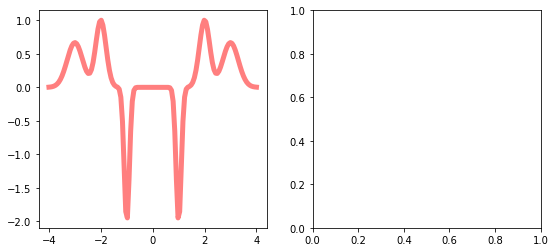

In [18]:
# Hier ist nichts zu tun, nur ausführen.
%matplotlib inline
fig, ax = plt.subplots(1, 2, figsize=(9, 4))
x = np.linspace(-4, 4, 128)
y = norm.pdf(x, loc=-3.0, scale=0.3) + norm.pdf(x, loc=-2.0, scale=0.2) - norm.pdf(x, loc=-1.0, scale=0.1) - norm.pdf(x, loc=1.0, scale=0.1) + norm.pdf(x, loc=2.0, scale=0.2) + norm.pdf(x, loc=3.0, scale=0.3)
y = y / np.max(y)
ax[0].plot(x, y, 'r-', lw=5, alpha=0.5)

Wählen Sie nun die Anzahl ```n1``` der Neuronen in der verdeckten Schicht und führen Sie die folgende Codezelle aus, um ein neuronales Netz mit einer verdeckten Schicht und reellwertigem Output zu definieren.

In [19]:
n1 = 10 # Hier eine Wahl treffen.

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(n1, activation="sigmoid", kernel_initializer=tf.initializers.lecun_uniform(1)),
    tf.keras.layers.Dense(1, use_bias=False, kernel_initializer=tf.initializers.lecun_uniform(1),
                          bias_initializer=tf.initializers.lecun_uniform(1))
])

Wählen Sie nun eine Lernrate ```learning_rate``` und führen Sie die folgende Codezelle aus, um das oben definierte Modell zu kompilieren.

In [20]:
learning_rate = 0.1 # Hier eine Wahl treffen.

model.compile(loss="mse", optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate))

Wählen Sie nun die Stapelgröße ```batch_size``` führen Sie die folgende Codezelle aus, um das Modell für 20000 Epochen zu trainieren (dies wird einige Minuten in Anspruch nehmen). Die Aufgabe gilt als erfüllt, wenn Sie einen Zielfunktionswert von weniger als 0.001 erreichen (dieser wird nach je 100 Epochen über dem linken Plot aktualisiert).

In [22]:
batch_size = 64 # Hier eine Wahl treffen.

for j in range(200):
    print(j)
    model.fit(x, y, epochs=100, batch_size=batch_size, verbose=0)
    if len(ax[0].lines) > 1:
        ax[0].lines[1].set_ydata(model.predict(x))
        ax[0].set_title("{}   {}".format(j * 100, model.evaluate(x, y, verbose=0)))
        for j in range(len(ax[1].lines)):
            ax[1].lines[j].set_ydata(model.weights[2][j, 0] * tf.keras.activations.sigmoid(model.weights[0][0, j] * x + model.weights[1][j]))
            ax[1].set_ylim([tf.reduce_min(model.weights[2]).numpy(), tf.reduce_max(model.weights[2]).numpy()])
            
    else:
        ax[0].plot(x, model.predict(x))
        ax[0].set_title("{}   {}".format(j * 100, model.evaluate(x, y, verbose=0)))
        for j in range(model.weights[0].shape[1]):
            ax[1].plot(x, model.weights[2][j, 0] * tf.keras.activations.sigmoid(model.weights[0][0, j] * x + model.weights[1][j]))
            ax[1].set_ylim([tf.reduce_min(model.weights[2]).numpy(), tf.reduce_max(model.weights[2]).numpy()])
    fig.canvas.draw()
    time.sleep(1)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199


## Aufgabe H.3.6

Gehen Sie im Folgenden analog zu oben vor. Hier ist lediglich $f(x) = \lceil\sin(\pi x)\rceil$ und wir verwenden ```relu``` statt ```sigmoid``` als Aktivierungsfunktion in der verdeckten Schicht. Die Aufgabe gilt auch hier als erfüllt, wenn Sie einen Zielfunktionswert von weniger als 0.01 erreichen.

In [5]:
# Hier ist nichts zu tun, nur ausführen.
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
import tensorflow as tf
import time

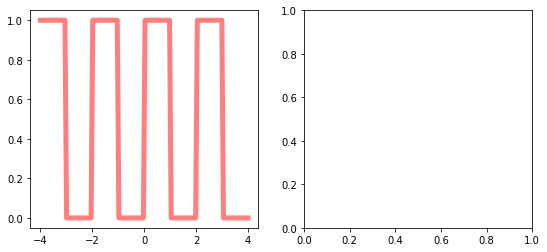

In [6]:
# Hier ist nichts zu tun, nur ausführen.
%matplotlib inline
fig, ax = plt.subplots(1, 2, figsize=(9, 4))
x = np.linspace(-4, 4, 128)
y = y = np.ceil(np.sin(np.pi * x))
y = y / np.max(y)
ax[0].plot(x, y, 'r-', lw=5, alpha=0.5)

In [9]:
n1 = 10 # Hier eine Wahl treffen.

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(n1, activation="relu", kernel_initializer=tf.initializers.lecun_uniform(1)),
    tf.keras.layers.Dense(1, use_bias=False, kernel_initializer=tf.initializers.lecun_uniform(1),
                          bias_initializer=tf.initializers.lecun_uniform(1))
])

In [10]:
learning_rate = 0.01 # Hier eine Wahl treffen

model.compile(loss="mse", optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate))

In [11]:
batch_size = 64 # Hier eine Wahl treffen.

for j in range(200):
    model.fit(x, y, epochs=100, batch_size=batch_size, verbose=0)
    if len(ax[0].lines) > 1:
        ax[0].lines[1].set_ydata(model.predict(x))
        ax[0].set_title("{}   {}".format(i * 100, model.evaluate(x, y, verbose=0)))
        for j in range(len(ax[1].lines)):
            ax[1].lines[j].set_ydata(model.weights[2][j, 0] * tf.keras.activations.relu(model.weights[0][0, j] * x + model.weights[1][j]))
            ax[1].set_ylim([tf.reduce_min(model.weights[2]).numpy(), tf.reduce_max(model.weights[2]).numpy()])
            
    else:
        ax[0].plot(x, model.predict(x))
        ax[0].set_title("{}   {}".format(i * 100, model.evaluate(x, y, verbose=0)))
        for j in range(model.weights[0].shape[1]):
            ax[1].plot(x, model.weights[2][j, 0] * tf.keras.activations.relu(model.weights[0][0, j] * x + model.weights[1][j]))
            ax[1].set_ylim([tf.reduce_min(model.weights[2]).numpy(), tf.reduce_max(model.weights[2]).numpy()])
    fig.canvas.draw()
    time.sleep(1)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


NameError: name 'i' is not defined

In [ ]:
x.shape

In [ ]:
type(x)